<center><h1>MÔ HÌNH CHẤM ĐIỂM TÍN DỤNG</h1></center>

---
**Context**

Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

Generally speaking, credit score cards are based on historical data. Once encountering large economic fluctuations. Past models may lose their original predictive power. Logistic model is a common method for credit scoring. Because Logistic is suitable for binary classification tasks and can calculate the coefficients of each feature. In order to facilitate understanding and operation, the score card will multiply the logistic regression coefficient by a certain value (such as 100) and round it.

At present, with the development of machine learning algorithms. More predictive methods such as Boosting, Random Forest, and Support Vector Machines have been introduced into credit card scoring. However, these methods often do not have good transparency. It may be difficult to provide customers and regulators with a reason for rejection or acceptance.


**Task**

Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct you label. Also, unbalance data problem is a big problem in this task.


# Import

In [1]:
import warnings
import missingno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)          # Show all columns
pd.set_option('display.width', None)                # Adjust width dynamically
pd.set_option('display.expand_frame_repr', False)   # Prevent column wrapping
warnings.filterwarnings('ignore')                   # To avoid all warnings

# Preprocessing

Firstly, we will be focusing on the application dataset

In [3]:
application = pd.read_csv('E:/CHUYÊN ĐỀ/TLTK/Chấm điểm tín dụng/application_record.csv')
credit_record = pd.read_csv("E:/CHUYÊN ĐỀ/TLTK/Chấm điểm tín dụng/credit_record.csv")

In [4]:
print(f'application shape: {application.shape}')
print(f'credit_record shape: {credit_record.shape}')

application shape: (438557, 18)
credit_record shape: (1048575, 3)


In [5]:
credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [6]:
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


- ID: Unique Id of the row
- CODE_GENDER: Gender of the applicant. M is male and F is female.
- FLAG_OWN_CAR: Is an applicant with a car. Y is Yes and N is NO.
- FLAG_OWN_REALTY: Is an applicant with realty. Y is Yes and N is No.
- CNT_CHILDREN: Count of children.
- AMT_INCOME_TOTAL: the amount of the income.
- NAME_INCOME_TYPE: The type of income (5 types in total).
- NAME_EDUCATION_TYPE: The type of education (5 types in total).
- NAME_FAMILY_STATUS: The type of family status (6 types in total).
- DAYS_BIRTH: The number of the days from birth (Negative values).
- DAYS_EMPLOYED: The number of the days from employed (Negative values). This column has error values.
- FLAG_MOBIL: Is an applicant with a mobile. 1 is True and 0 is False.
- FLAG_WORK_PHONE: Is an applicant with a work phone. 1 is True and 0 is False.
- FLAG_PHONE: Is an applicant with a phone. 1 is True and 0 is False.
- FLAG_EMAIL: Is an applicant with a email. 1 is True and 0 is False.
- OCCUPATION_TYPE: The type of occupation (19 types in total). This column has missing values.
- CNT_FAM_MEMBERS: The count of family members.

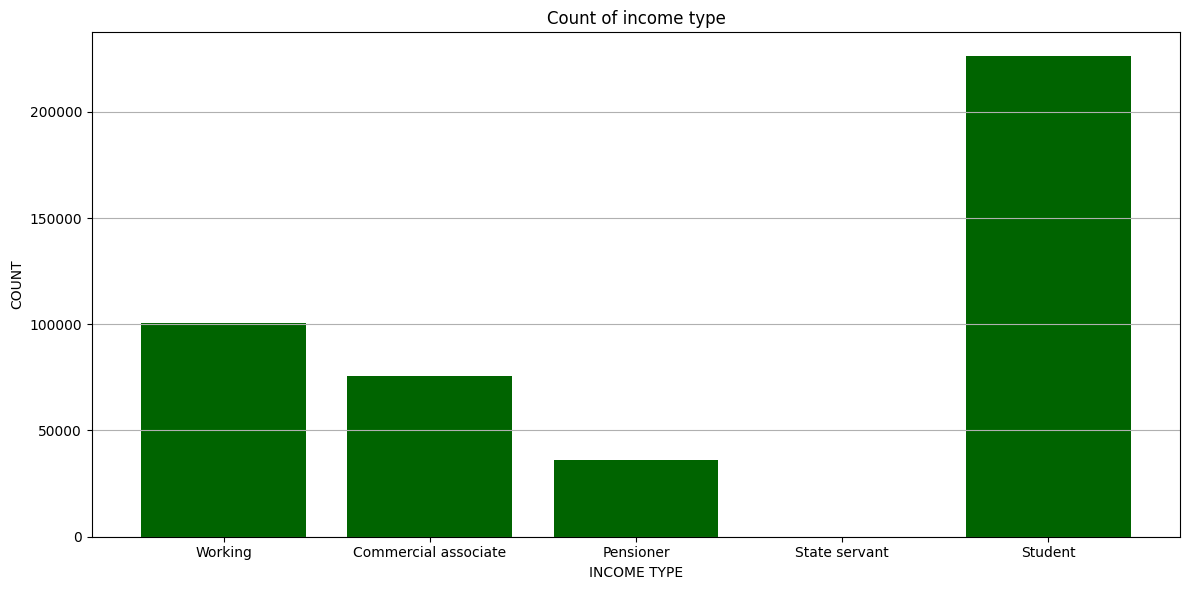

In [7]:
  
income_type = application['NAME_INCOME_TYPE'].unique() 
income_type_count= application.groupby('NAME_INCOME_TYPE')['ID'].count().reset_index()


# Vẽ đồ thị  
plt.figure(figsize=(12, 6))  
plt.bar(income_type, income_type_count['ID'], color='darkgreen')  
plt.title('Count of income type')  
plt.xlabel('INCOME TYPE')  
plt.ylabel('COUNT')  
plt.xticks(rotation=00)  # Xoay nhãn sản phẩm cho dễ nhìn  
plt.grid(axis='y')  

# Hiện thị đồ thị  
plt.tight_layout()  
plt.show()  

## Tìm và loại bỏ dữ liệu trùng lặp

In [8]:
application.duplicated(subset='ID').value_counts()

False    438510
True         47
Name: count, dtype: int64

In [9]:
application.drop_duplicates(subset='ID', inplace=True)

## Phân bố của các biến định tính

In [10]:
features = application.select_dtypes(include='object').columns.tolist()

for feature in features:
  print(f'{feature}: {application[feature].nunique()}')
  print(f'{application[feature].unique()}')

CODE_GENDER: 2
['M' 'F']
FLAG_OWN_CAR: 2
['Y' 'N']
FLAG_OWN_REALTY: 2
['Y' 'N']
NAME_INCOME_TYPE: 5
['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
NAME_EDUCATION_TYPE: 5
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS: 5
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
NAME_HOUSING_TYPE: 6
['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
OCCUPATION_TYPE: 18
[nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']


array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>],
       [<Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'DAYS_EMPLOYED'}>,
        <Axes: title={'center': 'FLAG_MOBIL'}>],
       [<Axes: title={'center': 'FLAG_WORK_PHONE'}>,
        <Axes: title={'center': 'FLAG_PHONE'}>,
        <Axes: title={'center': 'FLAG_EMAIL'}>],
       [<Axes: title={'center': 'CNT_FAM_MEMBERS'}>, <Axes: >, <Axes: >]],
      dtype=object)

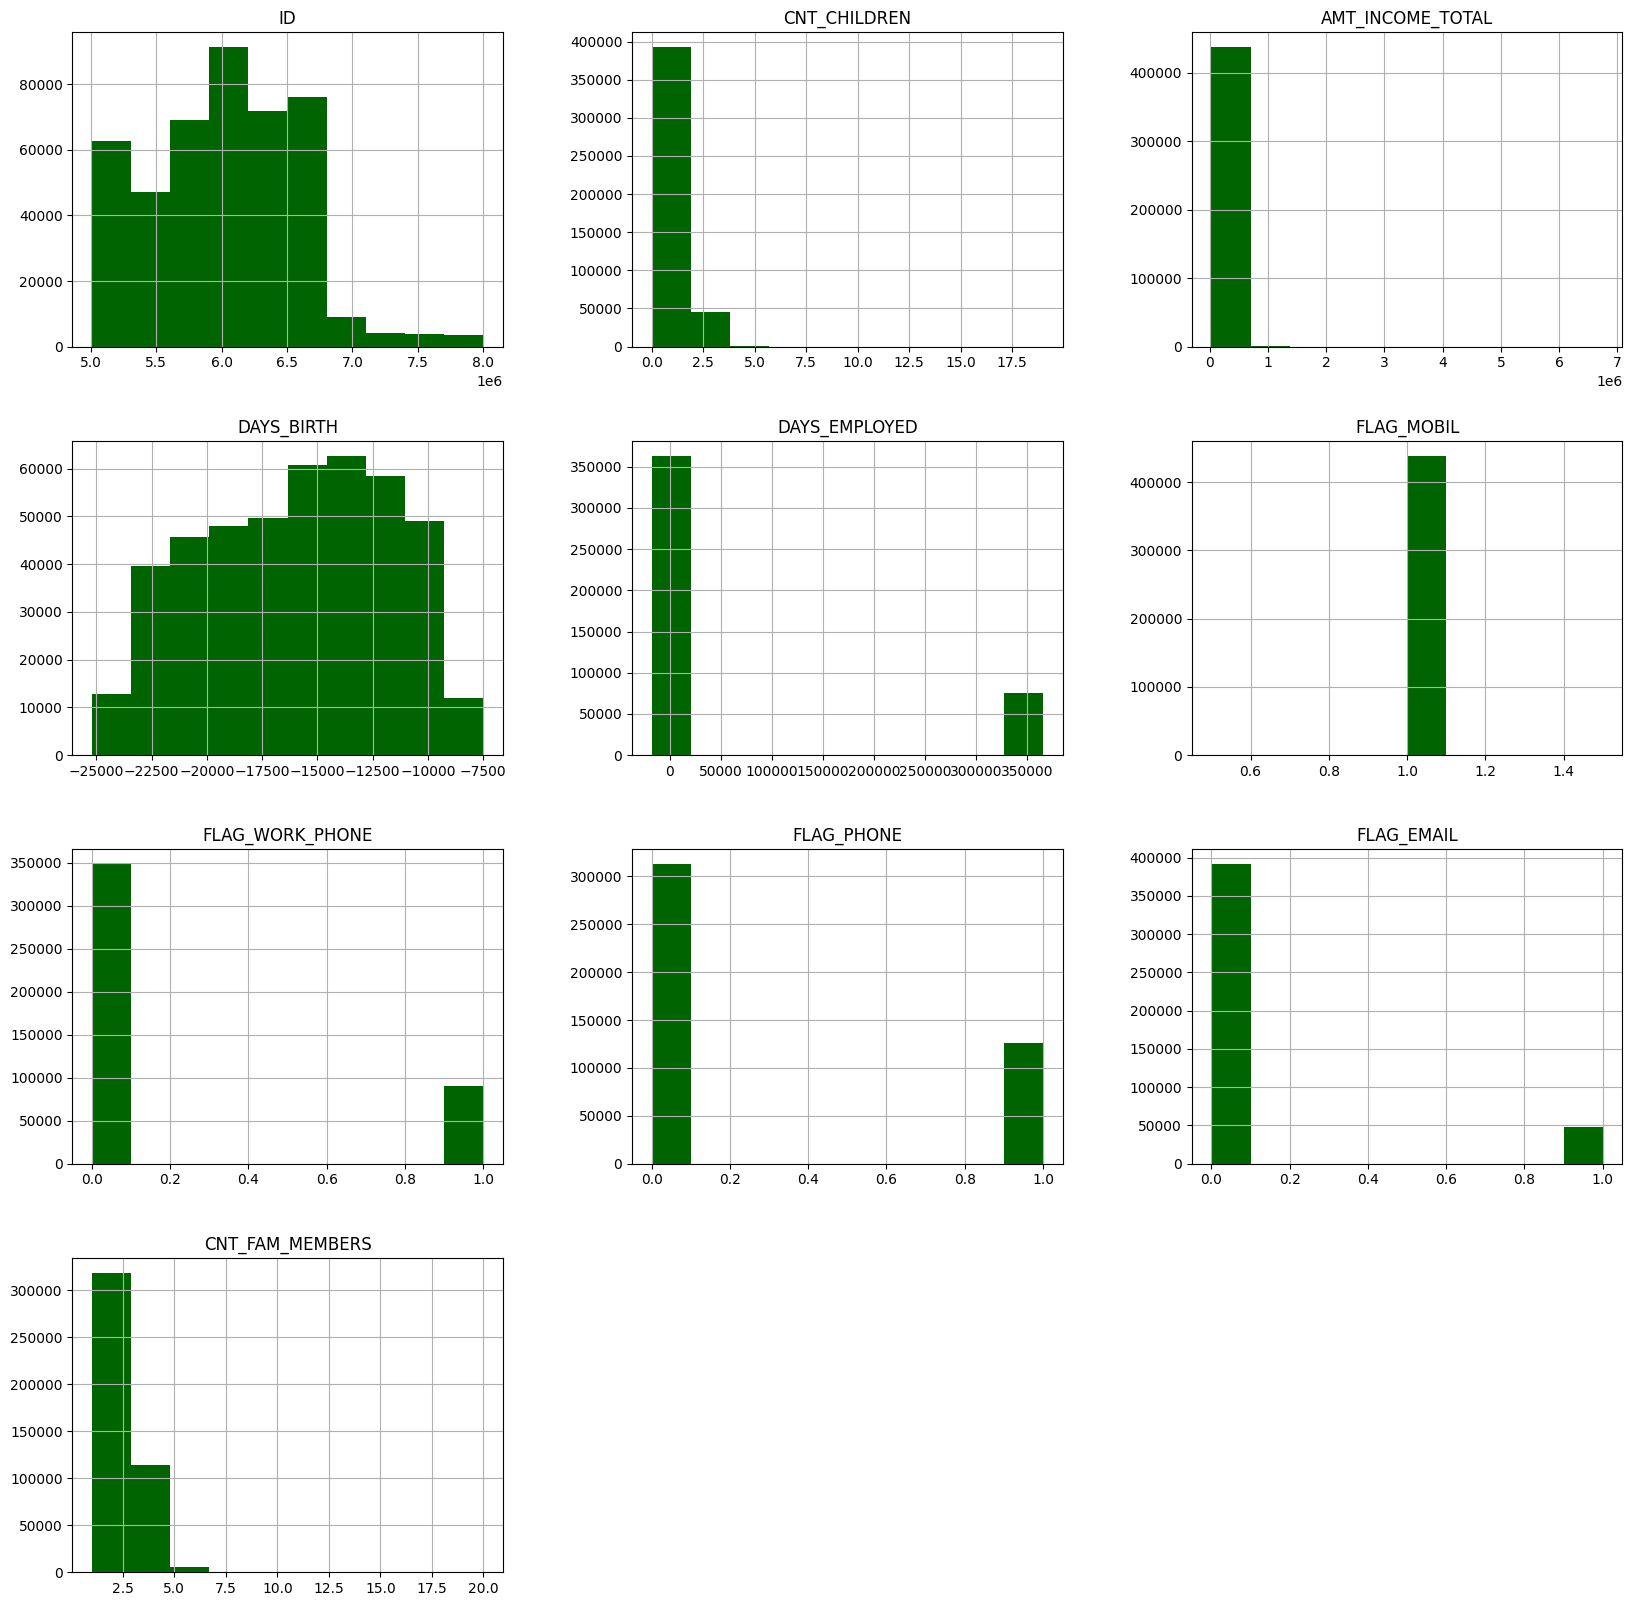

In [11]:
application.hist(figsize=(20,20),color= 'darkgreen')


## Kiểm tra giá trị null

In [12]:
application.isnull().sum()


ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134193
CNT_FAM_MEMBERS             0
dtype: int64

Hầu hết giá trị rỗng đến từ biến Occupation_type

<Axes: >

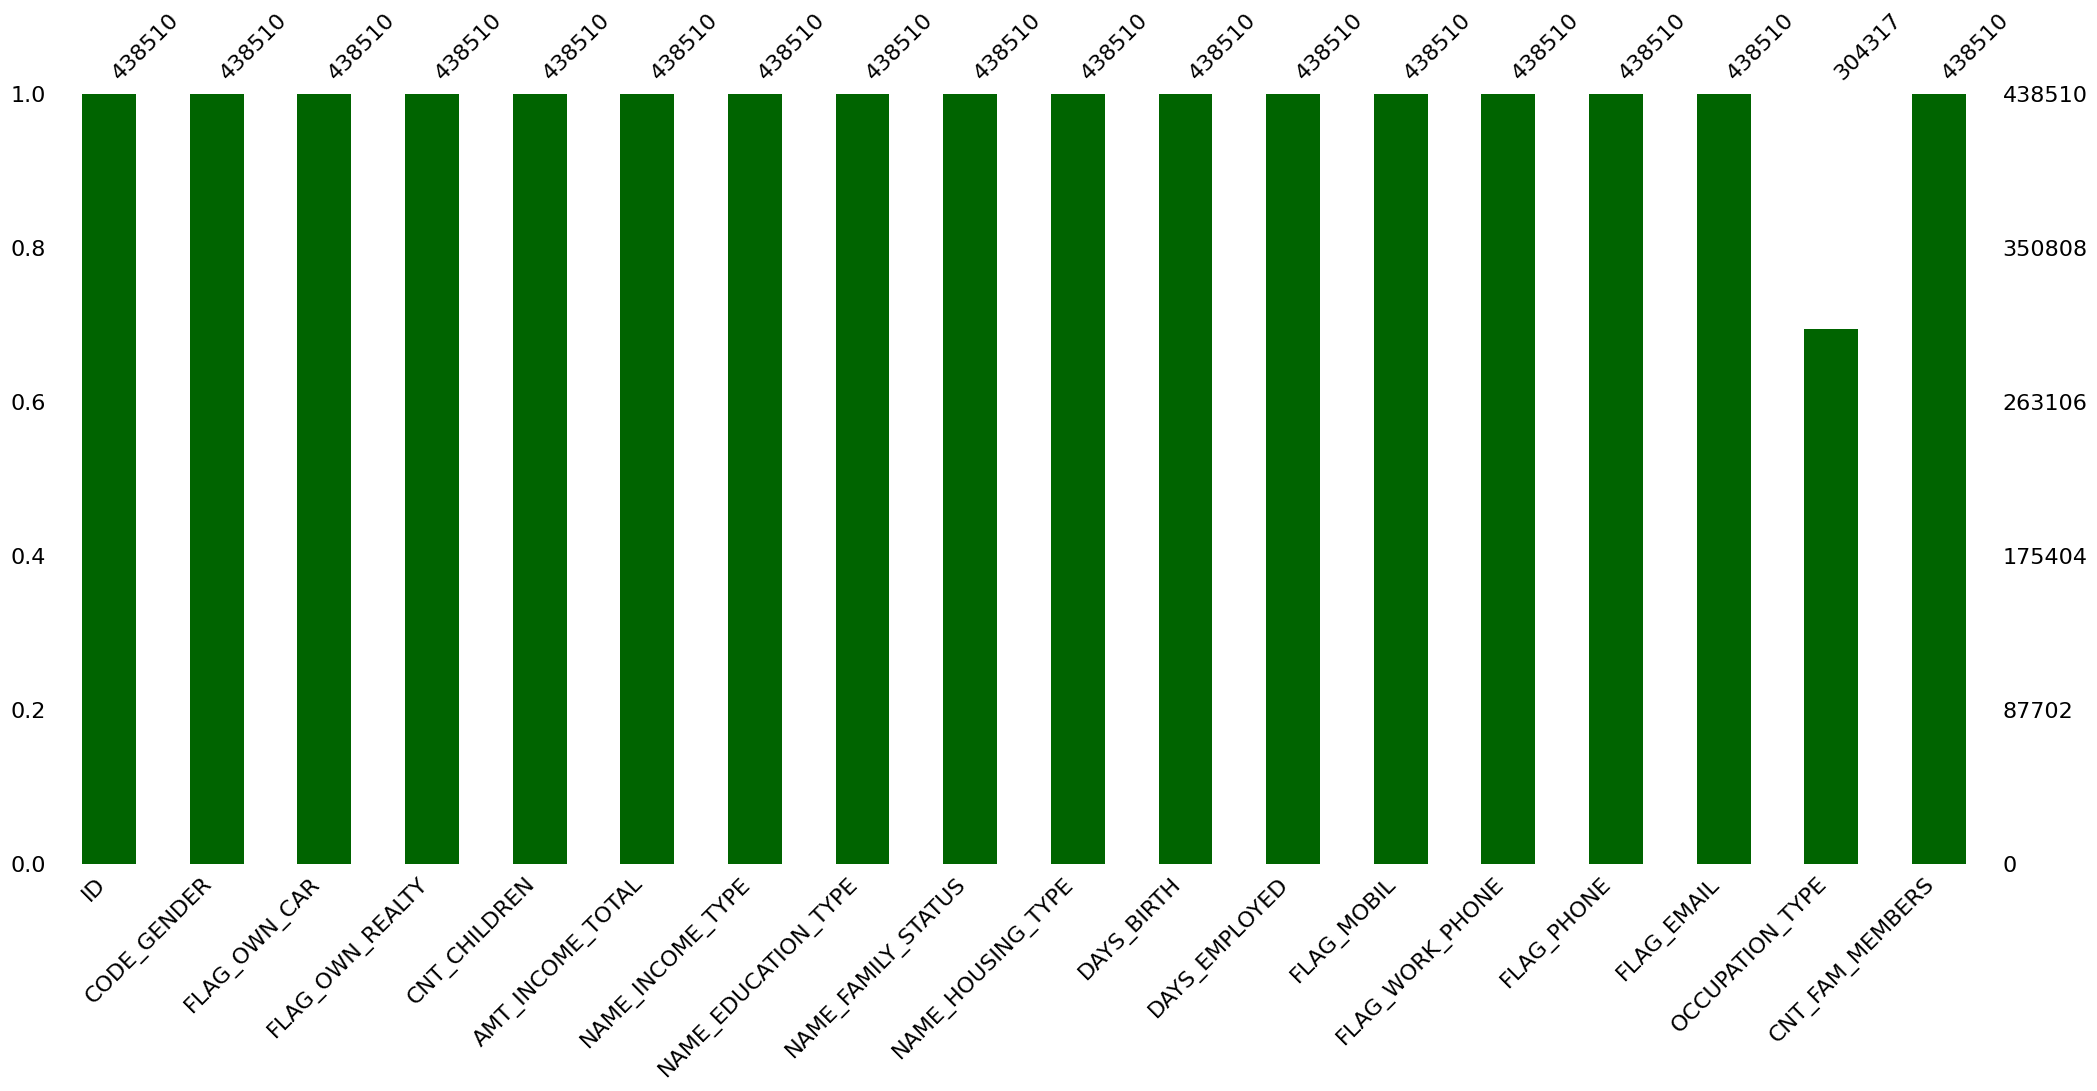

In [13]:
missingno.bar(application,color="darkgreen")

In [14]:
print((application['OCCUPATION_TYPE'].isnull().sum() / application.shape[0]) * 100 ,'%')

30.602038722035985 %


Có hơn 30% quan sát nhận giá trị rỗng của biến occupation_type 

In [15]:
pensioners = application['OCCUPATION_TYPE'][application['NAME_INCOME_TYPE'] == 'Pensioner']
others = application['OCCUPATION_TYPE'][application['NAME_INCOME_TYPE'] != 'Pensioner']

print(f"Percentage of nulls that are pensioners: {(pensioners.isnull().sum() / application['OCCUPATION_TYPE'].isnull().sum()) * 100} %")
print(f"Percentage of nulls that are NOT pensioners: {(others.isnull().sum() / application['OCCUPATION_TYPE'].isnull().sum()) * 100} %")

Percentage of nulls that are pensioners: 56.15196023637596 %
Percentage of nulls that are NOT pensioners: 43.84803976362404 %


Có hơn 56% người không có nghề nghiệp đến từ những người nghỉ hưu, còn lại đến từ 4 loại thu nhập còn lại

3 biến name_income_type, name_education_type và occupation_type liên quan tới nhau nên sẽ phân tích thêm để từ đó điền các giá trị còn rỗng của các qsat ở biến occupation_type

In [16]:
df = pd.DataFrame(application[['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE']])
df.set_index(['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE'], inplace=True)

df.dropna(inplace=True)
df

OCCUPATION_TYPE
NAME_INCOME_TYPE     NAME_EDUCATION_TYPE                          
Working              Secondary / secondary special  Security staff
Commercial associate Secondary / secondary special     Sales staff
                     Secondary / secondary special     Sales staff
                     Secondary / secondary special     Sales staff
                     Secondary / secondary special     Sales staff
...                                                            ...
Working              Higher education                     Laborers
                     Secondary / secondary special        Laborers
                     Secondary / secondary special        Laborers
Commercial associate Higher education                  Sales staff
Working              Secondary / secondary special     Sales staff

[304317 rows x 1 columns]

Đoạn mã này giúp tạo một bảng con từ dữ liệu gốc (application), đặt chỉ mục cho bảng dựa trên hai cột 'NAME_INCOME_TYPE' và 'NAME_EDUCATION_TYPE', và sau đó loại bỏ các dòng có giá trị thiếu.

In [17]:
for job in application['NAME_INCOME_TYPE'].unique():
    for edu in application['NAME_EDUCATION_TYPE'].unique():
        if job == 'Student' and edu not in ['Higher education', 'Secondary / secondary special']:
            continue
        if job == 'Pensioner' and edu not in ['Higher education', 'Secondary / secondary special', 'Incomplete higher']:
            continue
        print(f"{job}, {edu}: {df.loc[job, edu]['OCCUPATION_TYPE'].mode()[0]}")

Working, Higher education: Core staff
Working, Secondary / secondary special: Laborers
Working, Incomplete higher: Laborers
Working, Lower secondary: Laborers
Working, Academic degree: Core staff
Commercial associate, Higher education: Managers
Commercial associate, Secondary / secondary special: Laborers
Commercial associate, Incomplete higher: Managers
Commercial associate, Lower secondary: Laborers
Commercial associate, Academic degree: Sales staff
Pensioner, Higher education: Core staff
Pensioner, Secondary / secondary special: Laborers
Pensioner, Incomplete higher: High skill tech staff
State servant, Higher education: Core staff
State servant, Secondary / secondary special: Core staff
State servant, Incomplete higher: Core staff
State servant, Lower secondary: Medicine staff
State servant, Academic degree: Managers
Student, Higher education: Core staff
Student, Secondary / secondary special: Laborers


Đoạn mã trên giúp lọc ra các cặp công việc và trình độ học vấn, và cho mỗi cặp hợp lệ, nó sẽ in ra nghề nghiệp phổ biến nhất trong cột OCCUPATION_TYPE của bảng df. Mã cũng áp dụng một số điều kiện lọc để đảm bảo chỉ xét các kết hợp công việc và trình độ học vấn hợp lệ.
Sau khi sẽ tiến hành điền các giá trị thiếu ở cột occupation_type

In [18]:
# Working
mask = (application['NAME_INCOME_TYPE'] == 'Working') & (application['NAME_EDUCATION_TYPE'].isin(['Higher education', 'Academic degree']))
application.loc[mask, 'OCCUPATION_TYPE'] = application.loc[mask, 'OCCUPATION_TYPE'].fillna('Core staff')

mask = (application['NAME_INCOME_TYPE'] == 'Working') & (application['NAME_EDUCATION_TYPE'].isin(['Secondary / secondary special', 'Incomplete higher', 'Lower secondary']))
application.loc[mask, 'OCCUPATION_TYPE'] = application.loc[mask, 'OCCUPATION_TYPE'].fillna('Laborers')

In [19]:
# Commercial associate
mask = (application['NAME_INCOME_TYPE'] == 'Commercial associate') & (application['NAME_EDUCATION_TYPE'].isin(['Higher education', 'Incomplete higher']))
application.loc[mask, 'OCCUPATION_TYPE'] = application.loc[mask, 'OCCUPATION_TYPE'].fillna('Managers')

mask = (application['NAME_INCOME_TYPE'] == 'Commercial associate') & (application['NAME_EDUCATION_TYPE'].isin(['Secondary / secondary special', 'Lower secondary']))
application.loc[mask, 'OCCUPATION_TYPE'] = application.loc[mask, 'OCCUPATION_TYPE'].fillna('Laborers')

mask = (application['NAME_INCOME_TYPE'] == 'Commercial associate') & (application['NAME_EDUCATION_TYPE'].isin(['Academic degree']))
application.loc[mask, 'OCCUPATION_TYPE'] = application.loc[mask, 'OCCUPATION_TYPE'].fillna('Sales staff')

In [20]:
# State servant
mask = (application['NAME_INCOME_TYPE'] == 'State servant') & (application['NAME_EDUCATION_TYPE'].isin(['Higher education', 'Secondary / secondary special', 'Incomplete higher']))
application.loc[mask, 'OCCUPATION_TYPE'] = application.loc[mask, 'OCCUPATION_TYPE'].fillna('Core staff')

mask = (application['NAME_INCOME_TYPE'] == 'State servant') & (application['NAME_EDUCATION_TYPE'].isin(['Lower secondary']))
application.loc[mask, 'OCCUPATION_TYPE'] = application.loc[mask, 'OCCUPATION_TYPE'].fillna('Medicine staff')

mask = (application['NAME_INCOME_TYPE'] == 'State servant') & (application['NAME_EDUCATION_TYPE'].isin(['Academic degree']))
application.loc[mask, 'OCCUPATION_TYPE'] = application.loc[mask, 'OCCUPATION_TYPE'].fillna('Managers')

In [21]:
# Pensioner
mask = (application['NAME_INCOME_TYPE'] == 'Pensioner') & (application['NAME_EDUCATION_TYPE'].isin(['Higher education']))
application.loc[mask, 'OCCUPATION_TYPE'] = application.loc[mask, 'OCCUPATION_TYPE'].fillna('Core staff')

mask = (application['NAME_INCOME_TYPE'] == 'Pensioner') & (application['NAME_EDUCATION_TYPE'].isin(['Secondary / secondary special']))
application.loc[mask, 'OCCUPATION_TYPE'] = application.loc[mask, 'OCCUPATION_TYPE'].fillna('Laborers')

mask = (application['NAME_INCOME_TYPE'] == 'Pensioner') & (application['NAME_EDUCATION_TYPE'].isin(['Incomplete higher']))
application.loc[mask, 'OCCUPATION_TYPE'] = application.loc[mask, 'OCCUPATION_TYPE'].fillna('High skill tech staff')

In [22]:
# Student
mask = (application['NAME_INCOME_TYPE'] == 'Student') & (application['NAME_EDUCATION_TYPE'].isin(['Higher education']))
application.loc[mask, 'OCCUPATION_TYPE'] = application.loc[mask, 'OCCUPATION_TYPE'].fillna('Core staff')

mask = (application['NAME_INCOME_TYPE'] == 'Student') & (application['NAME_EDUCATION_TYPE'].isin(['Secondary / secondary special']))
application.loc[mask, 'OCCUPATION_TYPE'] = application.loc[mask, 'OCCUPATION_TYPE'].fillna('Laborers')

In [23]:
#Sau khi thay thế các giá trị null thì kiểm tra lại tỷ lệ giá trị null
print(f"{(application['OCCUPATION_TYPE'].isnull().sum() / application.shape[0]) * 100} %")

0.368520672276573 %


Các quan sát rỗng còn lại sẽ điền bằng giá trị xuất hiện nhiều nhất

In [24]:
application['OCCUPATION_TYPE'].fillna(application['OCCUPATION_TYPE'].mode()[0], inplace=True)

print(f"{(application['OCCUPATION_TYPE'].isnull().sum() / application.shape[0]) * 100} %")

0.0 %


## Kiểm tra outlier

In [79]:
#features = application.columns.tolist()
#for col in features:
#    if col == 'ID':
 #       continue
 #   sns.boxplot(data=application, x=feature, y='ID',color='darkgreen')

 #   plt.title(col)
 #   plt.show()

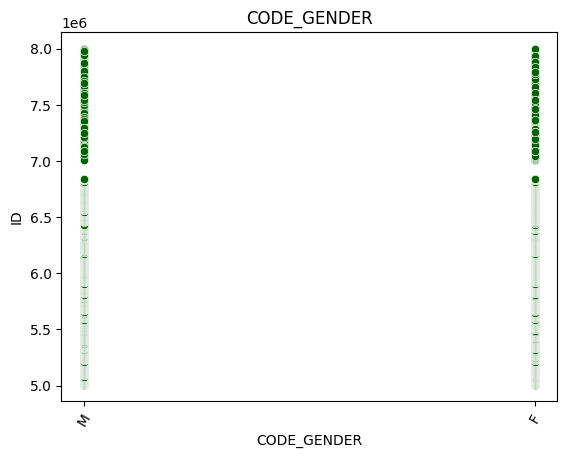

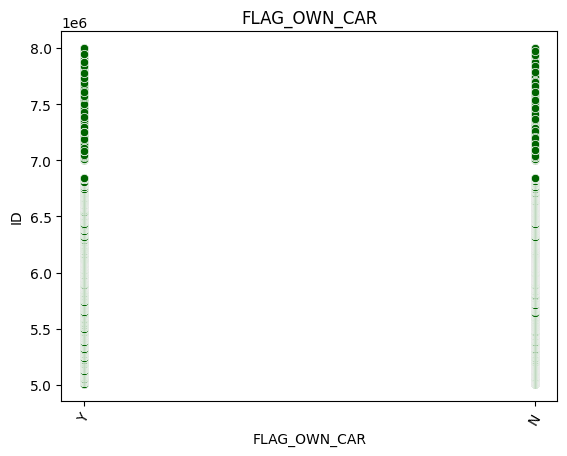

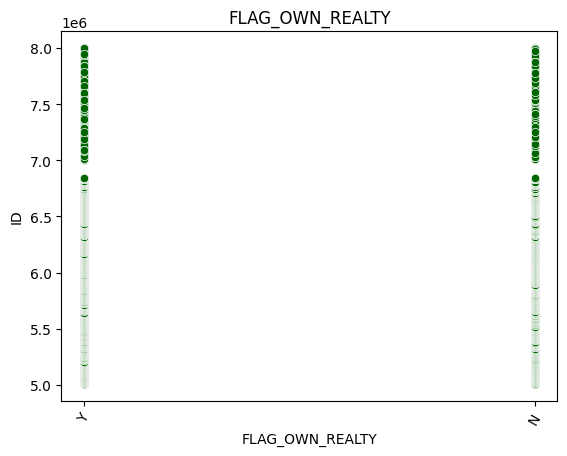

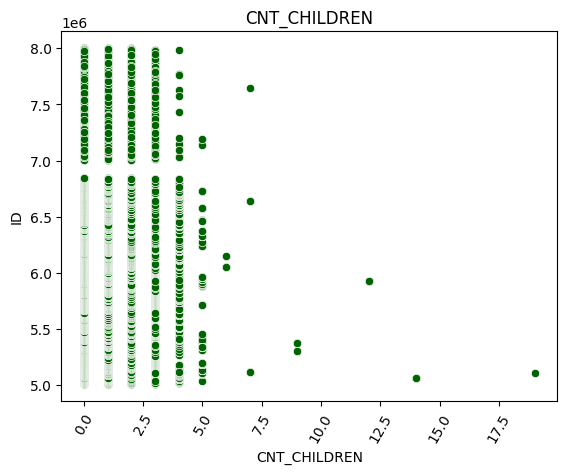

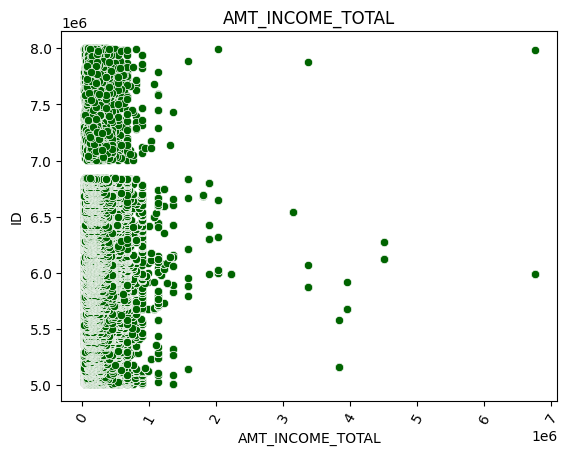

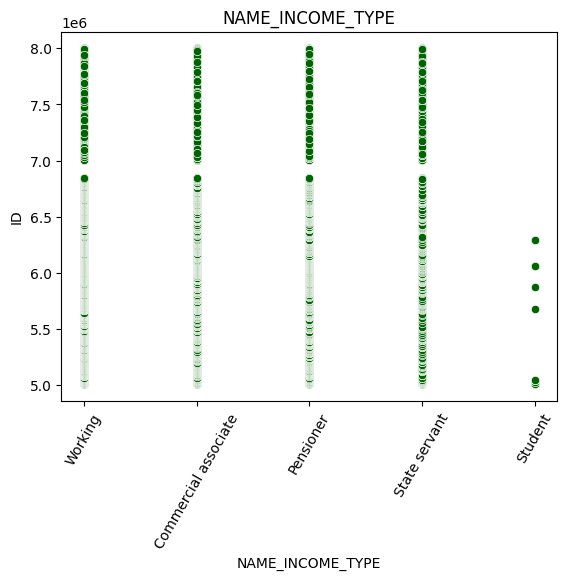

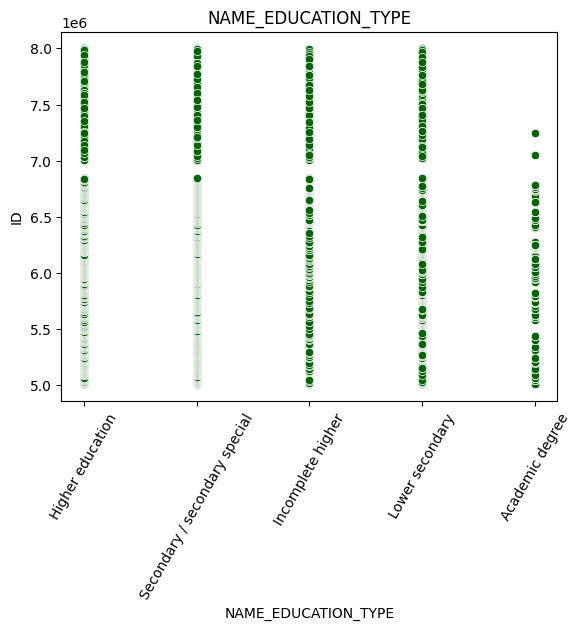

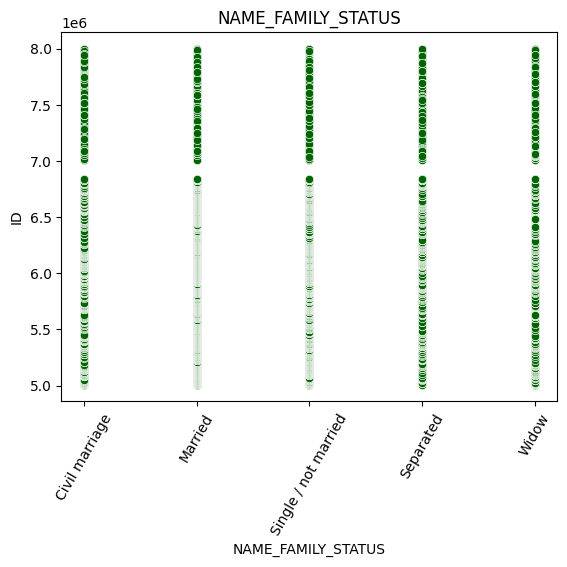

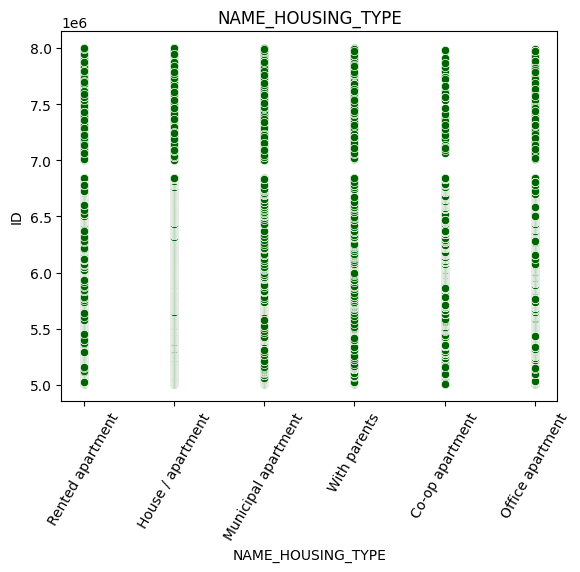

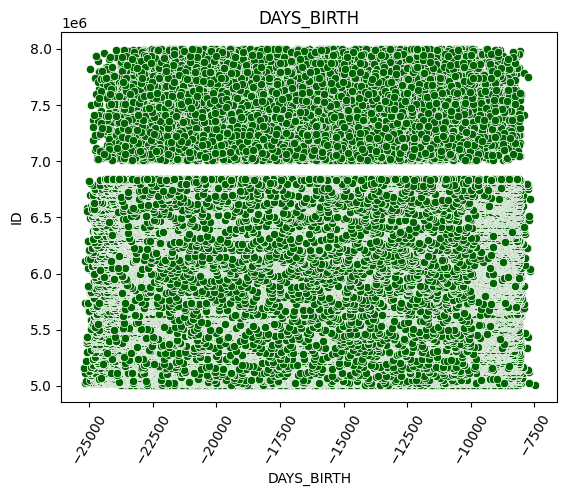

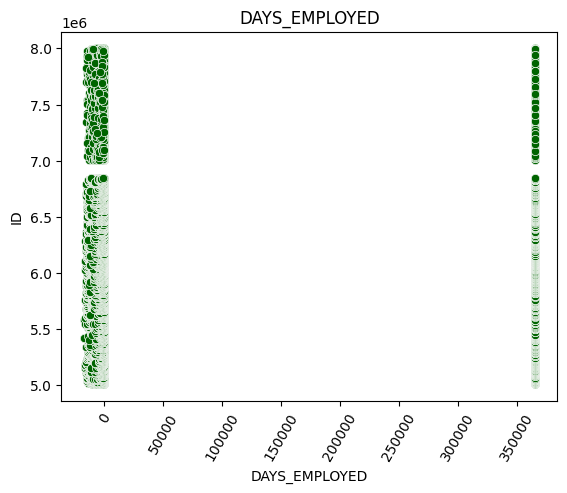

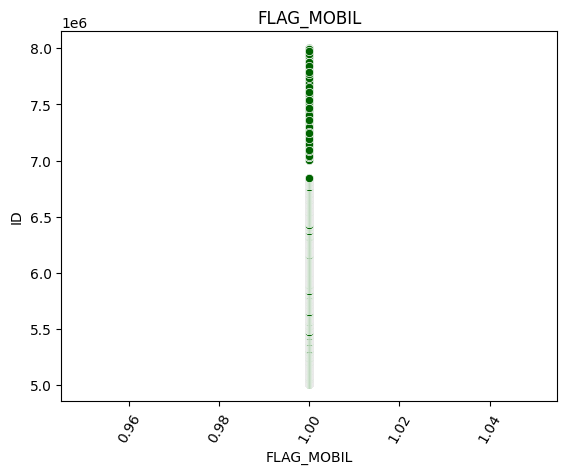

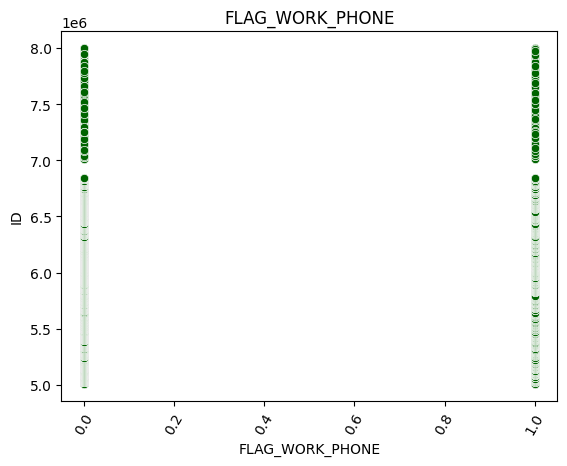

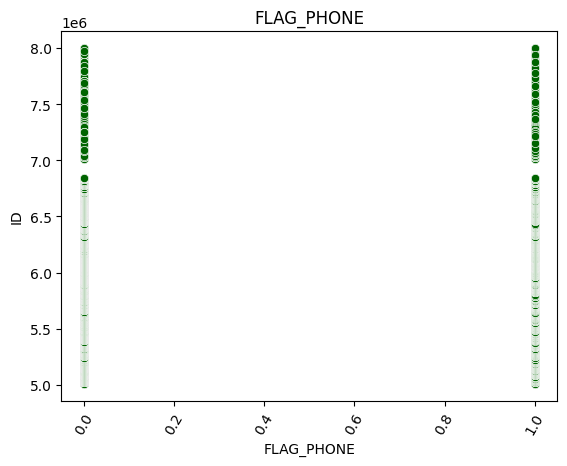

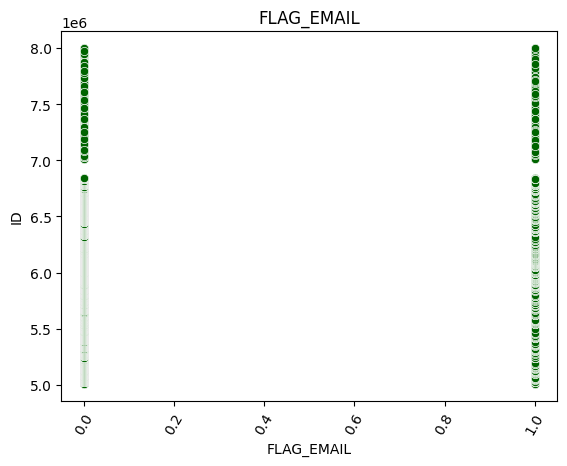

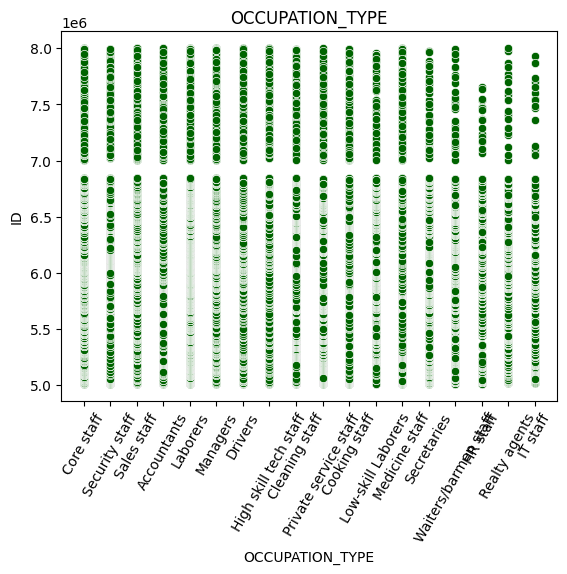

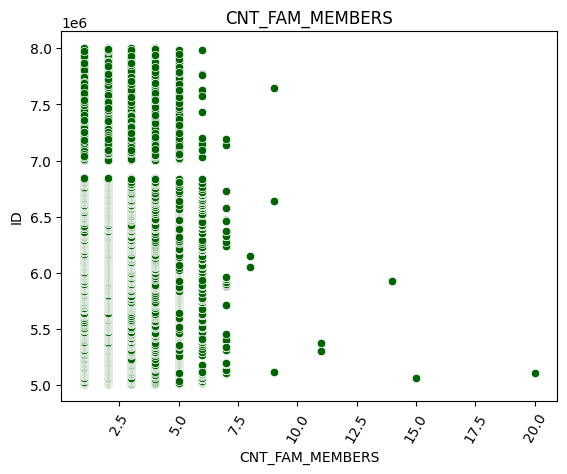

In [26]:
features = application.columns.tolist()

for feature in features:
    if feature == 'ID':
        continue
    sns.scatterplot(data=application, x=feature, y='ID',color='darkgreen')
    plt.title(feature)
    plt.xticks(rotation=60)
    plt.show()

It appears there are outliers in the following columns:

- CNT_CHILDREN
- AMT_INCOME_TOTAL
- CNT_FAM_MEMBERS

We will remove those outliers.

In [27]:
# CNT_CHILDREN
q_hi = application['CNT_CHILDREN'].quantile(0.999)
q_low = application['CNT_CHILDREN'].quantile(0.001)
application = application[(application['CNT_CHILDREN'] > q_low) & (application['CNT_CHILDREN'] < q_hi)]

In [28]:
# AMT_INCOME_TOTAL
q_hi = application['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = application['AMT_INCOME_TOTAL'].quantile(0.001)
application = application[(application['AMT_INCOME_TOTAL'] > q_low) & (application['AMT_INCOME_TOTAL'] < q_hi)]

In [29]:
# CNT_FAM_MEMBERS
q_hi = application['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = application['CNT_FAM_MEMBERS'].quantile(0.001)
application = application[(application['CNT_FAM_MEMBERS'] > q_low) & (application['CNT_FAM_MEMBERS'] < q_hi)]

## Mã hoá các biến định tính (Encoding)

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

object_features = application.select_dtypes(include='object').columns.tolist()
object_features

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE']

In [31]:
for feature in object_features:
    application[feature] = le.fit_transform(application[feature])
    
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
29,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,10,3.0
30,5008839,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,10,3.0
31,5008840,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,10,3.0
32,5008841,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,10,3.0
33,5008842,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,10,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438536,6837264,0,0,0,2,90000.0,2,1,3,1,-16062,-1275,1,0,0,0,3,4.0
438539,6837454,1,1,1,1,162000.0,2,4,1,1,-10890,-2675,1,0,0,0,3,3.0
438542,6837905,1,1,1,1,355050.0,4,4,1,1,-15904,-2614,1,0,0,0,8,3.0
438543,6837906,1,1,1,1,355050.0,4,4,1,1,-15904,-2614,1,0,0,0,8,3.0


# Tìm hiểu dữ liệu Credit_record

In [32]:
credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


- 0: quá hạn 1-29 ngày
- 1: quá hạn 30-59 ngày
- 2: quá hạn 60-89 ngày
- 3: quá hạn 90-119 ngày
- 4: quá hạn 120-149 ngày
- 5: nợ quá hạn hoặc nợ xấu, xóa nợ quá 150 ngày
- C: đã trả hết trong tháng đó
- X: Không vay trong tháng đó

Có vẻ như tập dữ liệu hồ sơ tín dụng được thiết lập theo định dạng cần được nhóm theo 'ID'.

Phương pháp tiếp cận như sau:

Mỗi 'ID' giữ tháng mới nhất (max(MONTHS_BALANCE)).
Mỗi 'ID' giữ trạng thái tệ nhất (cao nhất) sau khi chuyển đổi.
Nếu bất kỳ tháng nào có 'X' hoặc 'C' (chuyển đổi thành 0), trạng thái cuối cùng là 0 (Khách hàng tốt).
Nếu người dùng chỉ có các khoản thanh toán quá hạn, trạng thái cuối cùng là 1 (Khách hàng xấu).

Về cơ bản, chúng tôi đang săn lùng các khách hàng xấu, nếu 'TRẠNG THÁI' >= 2 biểu thị các khoản thanh toán quá hạn nghiêm trọng, thì phép chuyển đổi này đánh dấu những khách hàng đó bằng 1 (rủi ro cao). Nếu 'TRẠNG THÁI' < 2 nghĩa là rủi ro chấp nhận được hoặc khách hàng tốt, thì họ được đánh dấu bằng 0.

Vì theo quy định của BASEL quá hạn thanh toán nợ 90 ngày thì được coi là nợ xấu

In [33]:
credit_record['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)
credit_record['STATUS'] = credit_record['STATUS'].astype('int')
credit_record['STATUS'] = credit_record['STATUS'].apply(lambda x:1 if x > 2 else 0)

In [34]:
credit_record = credit_record.groupby('ID').agg(max).reset_index()

credit_record.drop('MONTHS_BALANCE', axis=1, inplace=True)

In [35]:
credit_record.head()

,ID,STATUS
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


Có vẻ như một vấn đề mới phát sinh, đó là sự mất cân bằng của các mẫu giá trị mục tiêu.

In [36]:
credit_record['STATUS'].value_counts(normalize=True)

STATUS
0    0.992802
1    0.007198
Name: proportion, dtype: float64

Sẽ giải quyết vấn đề này trong phần Xây dựng mô hình.

# Merging 2 bảng dữ liệu

In [37]:
df = pd.merge(application, credit_record, on='ID', how='inner')
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,10,3.0,0
1,5008839,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,10,3.0,0
2,5008840,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,10,3.0,0
3,5008841,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,10,3.0,0
4,5008842,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,10,3.0,0


In [38]:
df.shape

(9516, 19)

# Model Building

Splitting the data into X & y and further into train & test.

In [49]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)



In [50]:
X_train

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
4487,1,0,0,1,180000.0,4,3,1,1,-14291,-4707,1,0,0,0,8,3.0
7015,0,0,1,1,157500.0,4,4,1,1,-17262,-1107,1,1,1,0,14,3.0
9164,0,1,0,2,135000.0,4,1,1,1,-12804,-4977,1,0,0,0,0,4.0
5151,0,1,0,2,112500.0,4,4,1,1,-11870,-1497,1,1,1,0,14,4.0
9002,1,1,0,1,292500.0,0,4,1,1,-9328,-1000,1,0,0,0,4,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7330,1,1,1,2,450000.0,0,4,1,1,-13383,-489,1,0,1,0,4,4.0
1653,1,1,1,1,112500.0,4,4,0,1,-13165,-1022,1,0,0,0,4,3.0
6514,0,0,0,1,387000.0,0,1,1,1,-15220,-727,1,0,0,0,10,3.0
6338,0,0,1,1,135000.0,4,4,1,1,-18875,-2675,1,0,0,0,2,3.0


In [40]:
#Giải quyết vấn đề lấy mẫu quá mức bằng cách cân bằng các mẫu mục tiêu bằng SMOTE.
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

## XGBoost

In [51]:
#Scaling the training data.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
model = xgb.fit(X_train, y_train)
prediction = xgb.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, accuracy_score
print(f"Accuracy: {accuracy_score(y_test, prediction) * 100:.2f}%")
print(classification_report(y_test, prediction))

Accuracy: 98.88%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2833
           1       0.27      0.27      0.27        22

    accuracy                           0.99      2855
   macro avg       0.63      0.63      0.63      2855
weighted avg       0.99      0.99      0.99      2855



In [78]:
from sklearn.metrics import mean_squared_error
xgb_mse = mean_squared_error(y_test, prediction)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

0.12830567703757326

## Random forest


In [43]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo mô hình Random Forest
rf = RandomForestClassifier()

# Huấn luyện mô hình trên dữ liệu huấn luyện
model_rf = rf.fit(X_train, y_train)

# Dự đoán kết quả trên dữ liệu kiểm tra
prediction_rf = rf.predict(X_test)

In [44]:
print(f"Accuracy: {accuracy_score(y_test, prediction_rf) * 100:.2f}%")
print(classification_report(y_test, prediction_rf))

Accuracy: 98.95%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2833
           1       0.28      0.23      0.25        22

    accuracy                           0.99      2855
   macro avg       0.64      0.61      0.62      2855
weighted avg       0.99      0.99      0.99      2855



In [77]:
from sklearn.metrics import mean_squared_error
rf_mse = mean_squared_error(y_test, prediction_rf)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

0.12272447177306971

## Logistic regression

In [72]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
#Giải quyết vấn đề lấy mẫu quá mức bằng cách cân bằng các mẫu mục tiêu bằng SMOTE.
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [74]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
# Khởi tạo mô hình Logistic Regression
logreg = LogisticRegression()

# Huấn luyện mô hình trên dữ liệu huấn luyện
model_logreg = logreg.fit(X_train, y_train)

# Dự đoán kết quả trên dữ liệu kiểm tra
prediction_logreg = logreg.predict(X_test)

In [70]:
print(f"Accuracy: {accuracy_score(y_test, prediction_logreg) * 100:.2f}%")
print(classification_report(y_test, prediction_logreg))

Accuracy: 67.04%
              precision    recall  f1-score   support

           0       0.99      0.67      0.80      2833
           1       0.01      0.55      0.02        22

    accuracy                           0.67      2855
   macro avg       0.50      0.61      0.41      2855
weighted avg       0.99      0.67      0.80      2855



In [76]:
from sklearn.metrics import mean_squared_error
lr_mse = mean_squared_error(y_test, prediction_logreg)
lr_rmse = np.sqrt(lr_mse)
lr_rmse

0.548840522774676

In [75]:
coefficients = logreg.coef_
# Chuyển hệ số thành một DataFrame để dễ đọc
coeff_df = pd.DataFrame(coefficients.T, index=X.columns, columns=['Coefficient'])

# Làm tròn các hệ số tới 2 chữ số sau dấu phẩy
coeff_df['Coefficient'] = coeff_df['Coefficient'].apply(lambda x: round(x, 2))

# In ra hệ số hồi quy
print(coeff_df)

                     Coefficient
CODE_GENDER                -0.10
FLAG_OWN_CAR               -0.15
FLAG_OWN_REALTY            -0.30
CNT_CHILDREN               -0.13
AMT_INCOME_TOTAL           -0.00
NAME_INCOME_TYPE           -0.34
NAME_EDUCATION_TYPE        -0.30
NAME_FAMILY_STATUS          0.09
NAME_HOUSING_TYPE           0.02
DAYS_BIRTH                 -0.00
DAYS_EMPLOYED              -0.00
FLAG_MOBIL                  0.03
FLAG_WORK_PHONE            -0.00
FLAG_PHONE                  0.00
FLAG_EMAIL                 -0.06
OCCUPATION_TYPE             0.00
CNT_FAM_MEMBERS             0.04


In [67]:
# Huấn luyện mô hình Logistic Regression với statsmodels
logreg = sm.Logit(y_train, X_train)
result = logreg.fit()

# Lấy các hệ số hồi quy và p-values
coeff_df = pd.DataFrame({
    'Coefficient': result.params,
    'p-value': result.pvalues
})

# Thêm dấu '*' nếu p-value < 0.05
coeff_df['Significance'] = coeff_df['p-value'].apply(lambda x: '*' if x < 0.05 else '')

# Làm tròn các hệ số hồi quy và p-values
coeff_df['Coefficient'] = coeff_df['Coefficient'].apply(lambda x: round(x, 2))
coeff_df['p-value'] = coeff_df['p-value'].apply(lambda x: round(x, 3))

# In ra kết quả
print(coeff_df)

Optimization terminated successfully.
         Current function value: 0.403765
         Iterations 9
                     Coefficient  p-value Significance
CODE_GENDER                -0.40    0.000            *
FLAG_OWN_CAR               -1.37    0.000            *
FLAG_OWN_REALTY            -2.27    0.000            *
CNT_CHILDREN               -7.46    0.000            *
AMT_INCOME_TOTAL            0.00    0.000            *
NAME_INCOME_TYPE           -0.23    0.000            *
NAME_EDUCATION_TYPE        -0.38    0.000            *
NAME_FAMILY_STATUS          1.10    0.000            *
NAME_HOUSING_TYPE          -0.59    0.000            *
DAYS_BIRTH                 -0.00    0.000            *
DAYS_EMPLOYED              -0.00    0.000            *
FLAG_MOBIL                -10.64    0.000            *
FLAG_WORK_PHONE            -0.94    0.000            *
FLAG_PHONE                 -0.00    0.962             
FLAG_EMAIL                 -0.49    0.000            *
OCCUPATION_TYPE   